- Randomly sampling data from the following distributions
# Normal, Exponential, Bernoulli


- fitting the distribution on the data.

- Assessing how accurate the fit is as a function of the number of datapoints sampled

- Does the fit vary as a function of the true parameter?

### Normal Distribution (Gaussian distribution)

In [37]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

**Step 1: Randomly sample data from normal distribution using random variates function of normal distribution: norm.rvs()**

In [49]:
random_sample = norm.rvs(loc=0,scale=1,size=100) 
# Generate an array of 100 random sample from a normal dist with mean 0 and stdv 1

***Explanation: In the above line of code,we are generating an array of 100 random samples with loc i.e. mean as 0 & Scale i.e. standard deviation as 1***

**Step 2: Fitting the distribution using random sample data**

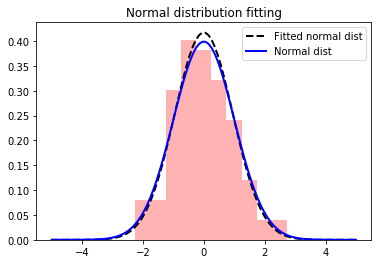

In [50]:
parameters = norm.fit(random_sample)
#Fitting distribution using norm.fit(data) function returning a list of 2 parameters: parameters[0] and parameters[1]
x = np.linspace(-5,5,100)
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
# Generate the probability density function (fitted distribution)
normal_pdf = norm.pdf(x)
# Generate the pdf (normal distribution non fitted)
plt.plot(x,fitted_pdf,"black",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(random_sample,normed=1,color="red",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting")
#defining the title of the plot
plt.legend()
# insert a legend in the plot (using label)
plt.show()
#Displaying the plot

***Explanation: In the above block of code, we are using norm.fit() function for distribution fitting using random sample, which further returns a list of 2 parameteres which are parameters[0] and parameters[1] where parameters[0] is mean and parameters[1] is standard deviation of the fitted distribution***

***Generated fitted probablity density function by specifying mean and standard deviation and non-fitted probablity density function***

***Finally, Displayed the plot of Fitted and non-fitted pdf***

**Step 3: Checking an accuracy of the Normal Distribution fit**

In [150]:
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

True

In [151]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(x, norm.cdf(x))
accuracy=100-a
accuracy

96.536143328682726

### Exponential Distribution

In [128]:
from scipy.stats import expon
import matplotlib.pyplot as plt

** Step 1: Randomly sample data from Exponential distribution using random variates function of Exponential distribution: expon.rvs()**

In [139]:
random_sample = expon.rvs(size=1000)
# Generate an array of 1000 random sample from a random variates function of Exponential distribution: expon.rvs()

***Explanation: In the above line of code,we are generating an array of 1000 random samples which is required for exponential model fitting***

**Step 2: Fitting the distribution using random sample data**

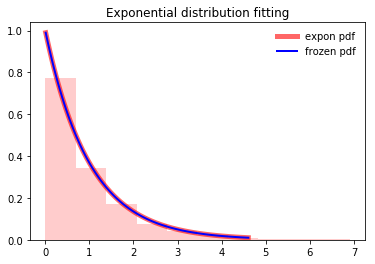

In [140]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = expon.stats(moments='mvsk')
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')
#Display the probability density function

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf',color='blue')
#freeze the distribution and display the frozen probability density function

ax.hist(random_sample, normed=True, alpha=0.2,color='red')
#genering the histogram

ax.legend(loc='best', frameon=False)
# insert a legend in the plot

plt.title("Exponential distribution fitting")
#defining the title of the plot

plt.show()
#Displaying the plot

***Explanation: In the above line of code, we are fitting the exponential model by displaying exponential probability density function and frozen pdf***

***Finally, Displayed the plot of exponential pdf and frozen pdf***

**Step 3: Checking an accuracy of the Exponential fit**

In [141]:
vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))

True

In [146]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(x, expon.cdf(x))
accuracy=100-a
accuracy

96.409619258051606

### Bernoulli Distribition

In [116]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

**Step 1: Randomly sample data from bernoulli distribution using random variates function of normal distribution: bernoulli.rvs()**

In [117]:
p = 0.3
random_sample = bernoulli.rvs(p, size=1000)
# Generate an array of 1000 random sample from a random variates function of Bernoulli distribution: bernoulli.rvs()
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

***Explanation: In the above line of code,we are generating an array of 1000 random samples which is required for bernoulli model fitting***

**Step 2: Fitting the distribution using random sample data**

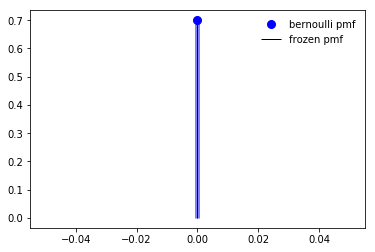

In [118]:
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

***Explanation: In the above block of code, we are fitting the bernoulli model and plotting the graphs of bernoulli pmf and frozen pmf***

**Step 3: Checking the accuracy of the Bernoulli distribution fit**

In [119]:
prob = bernoulli.cdf(x, p)
np.allclose(x, bernoulli.ppf(prob, p))

True

In [152]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(x, bernoulli.cdf(x,p))
accuracy=100-a
accuracy

96.54155586263748

**References:**

**https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.expon.html
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html
**